In [1]:
# direct to proper path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import seaborn as sns
from scipy.stats import norm
from scipy.special import erf
import numpy as np
import matplotlib.pyplot as plt
from codes.Environment import Mixture_AbsGau, setup_env, Exp, generate_samples

import matplotlib as mpl

mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.top'] = False
# mpl.rcParams['axes.spines.bottom'] = False

In [2]:
def Abs_Gau_pdf(x, mu, sigma):
    return 1.0/np.sqrt(2 * np.pi * sigma ** 2) * (np.exp(- 1.0/(2 * sigma**2) * (x - mu)** 2) + np.exp(- 1.0/(2 * sigma**2) * (x + mu)** 2 ))

def Abs_Gau_cdf(x, mu, sigma):
    return 1.0/2 * (erf((x-mu)/ np.sqrt(2 * sigma ** 2)) + erf((x+ mu)/ np.sqrt(2 * sigma ** 2)))

def Phi(x):
    return 1.0/2 * (1+ erf(x/np.sqrt(2)))

def Abs_Gau_mean(mu, sigma):
    return sigma * np.sqrt(2.0/np.pi) * np.exp(- mu ** 2 / (2 * sigma ** 2)) +\
            + mu * (1 - 2 * Phi(- mu/sigma))

def Abs_Gau_quant_est(p, mu, sigma, size = 10000):
    samples = np.abs(np.random.normal(mu, sigma, size))
    return np.sort(samples)[int(p * size)], samples

def Exp_pdf(x, para):
    return para * np.exp(- para * x)

def Exp_mean(para):
    return 1.0/para

def Exp_quant(p, para):
    return - np.log(1- p)/para

In [3]:
plot_mean_flag = False
plot_quant_flag = True
plot_quant_est_flag = True
p = 0.2
np.random.seed(24)

save_path = "../plots/slide_plots/"

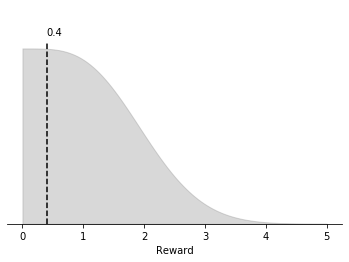

In [4]:
mu = 1.0
sigma = 1.0

x = np.linspace(0, 5, 100)
plt.fill_between(x, Abs_Gau_pdf(x, mu, sigma), color = 'grey', alpha = 0.3)

plt.ylim(0, 0.6)
plt.xlabel('Reward')
plt.yticks([])


if plot_mean_flag:
    mean = round(Abs_Gau_mean(mu, sigma),2)
    plt.vlines(mean, 0, 0.5, linestyles = 'dashed')
    plt.annotate(str(mean), (mean, 0.52))
    plt.savefig(save_path + 'arm1_mean.pdf', bbox_inches='tight', transparent=True)

if plot_quant_flag:
    quant,_ = Abs_Gau_quant_est(p, mu, sigma)
    quant = round(quant,2)
    plt.vlines(quant, 0, 0.5, linestyles = 'dashed')
    plt.annotate(str(quant), (quant, 0.52))
    plt.savefig(save_path + 'arm1_quant.pdf', bbox_inches='tight', transparent=True)

plt.savefig(save_path + 'arm1.pdf', bbox_inches='tight', transparent=True)


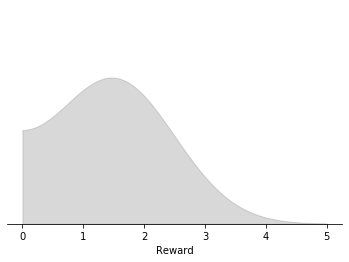

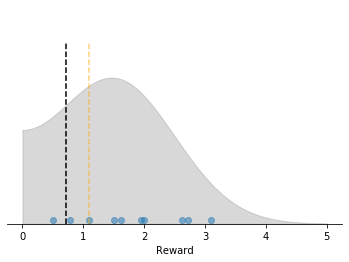

In [12]:
mu = 1.5
sigma = 1.0

x = np.linspace(0, 5, 100)
plt.fill_between(x, Abs_Gau_pdf(x, mu, sigma), color = 'grey', alpha = 0.3)

plt.ylim(0, 0.6)
plt.xlabel('Reward')
plt.yticks([])

if plot_mean_flag:
    mean = round(Abs_Gau_mean(mu, sigma),2)
    plt.vlines(mean, 0, 0.5, linestyles = 'dashed')
    plt.annotate(str(mean), (mean, 0.52))
    plt.savefig(save_path + 'arm2_mean.pdf', bbox_inches='tight', transparent=True)
    
if plot_quant_flag:
    quant, samples = Abs_Gau_quant_est(p, mu, sigma)
    quant = round(quant,2)
    
    if plot_quant_est_flag:
#         plt.xlim(0,3)
        for num_sample in [10]: # 5, 10, 100
            plt.figure()
            x = np.linspace(0, 5, 100)
            plt.fill_between(x, Abs_Gau_pdf(x, mu, sigma), color = 'grey', alpha = 0.3)

            plt.ylim(0, 0.6)
            plt.xlabel('Reward')
            plt.yticks([])
            plt.vlines(quant, 0, 0.5, linestyles = 'dashed')
            
            plt.scatter(samples[:num_sample], np.ones(num_sample) * 0.01, alpha = 0.5)
            
            quant_est = np.sort(samples[:num_sample])[int(p * num_sample)]
            quant_est = round(quant_est,2)
            plt.vlines(quant_est, 0, 0.5, linestyles = 'dashed', color = 'orange', alpha = 0.5)
        #     plt.annotate(str(quant_est), (quant_est, 0.52))
            plt.savefig(save_path + 'arm2_quant_' + str(num_sample) + '.pdf', bbox_inches='tight', transparent=True)
    else:
        plt.vlines(quant, 0, 0.5, linestyles = 'dashed')
        plt.annotate(str(quant), (quant, 0.52))    
    plt.savefig(save_path + 'arm2_quant.pdf', bbox_inches='tight', transparent=True)
plt.savefig(save_path + 'arm2.pdf', bbox_inches='tight', transparent=True)

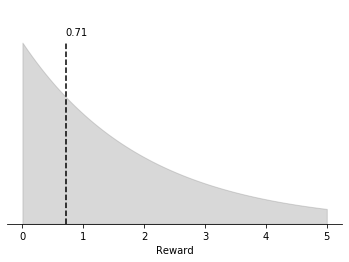

In [10]:
para = 0.5

x = np.linspace(0, 5, 100)
plt.fill_between(x, Exp_pdf(x, para), color = 'grey', alpha = 0.3)
plt.ylim(0, 0.6)
plt.xlabel('Reward')
plt.yticks([])

if plot_mean_flag:
    mean = round(Exp_mean(para),2)
    plt.vlines(mean, 0, 0.5, linestyles = 'dashed')
    plt.annotate(str(mean), (mean, 0.52))
    plt.savefig(save_path + 'arm3_mean.pdf', bbox_inches='tight', transparent=True)

if plot_quant_flag:
    quant, samples = Abs_Gau_quant_est(p, mu, sigma)
    quant = round(quant,2)
    plt.vlines(quant, 0, 0.5, linestyles = 'dashed')
    plt.annotate(str(quant), (quant, 0.52))
    plt.savefig(save_path + 'arm3_quant.pdf', bbox_inches='tight', transparent=True)

plt.savefig(save_path + 'arm3.pdf', bbox_inches='tight', transparent=True)